# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.


Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. For example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

We are given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Project Overview

In this project, an attempt has been mae to analyse how Starbucks customers use the app. The promotion for starbucks using various offers and are these offers actually helpful. The data sets used in this project contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. The customer's behaviour has been attempted to analyse based on the dataset.

### Cleaning

Cleaning data is especially important and tricky.
From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. It is important to assess what a certain demographic group will buy when not receiving any offers.

### Analysis
 
#### Business understanding and data exploration
 
The dataset should be well used and all aspects of the data need to be considered to build the model, but first the data should be explored, the relationship between various variables need to be extracted to form an intuition. 

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.



#### DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
from sklearn.preprocessing import OneHotEncoder,MultiLabelBinarizer
import matplotlib.pyplot as plt

import seaborn as sns

#### DATA  EXPLORATION
The below cells contain the exploration of data and an attempt has been made to analyse data and derive relation out of it using plots 

In [3]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [4]:
portfolio.shape

(10, 6)

In [5]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [6]:
profile.shape

(17000, 5)

In [7]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [8]:
transcript.shape

(306534, 4)

In [9]:
portfolio.dtypes,transcript.dtypes,profile.dtypes


(channels      object
 difficulty     int64
 duration       int64
 id            object
 offer_type    object
 reward         int64
 dtype: object, event     object
 person    object
 time       int64
 value     object
 dtype: object, age                   int64
 became_member_on      int64
 gender               object
 id                   object
 income              float64
 dtype: object)

In [10]:
portfolio['offer_type']

0             bogo
1             bogo
2    informational
3             bogo
4         discount
5         discount
6         discount
7    informational
8             bogo
9         discount
Name: offer_type, dtype: object

In [11]:
data=pd.get_dummies(portfolio['offer_type'])

In [12]:
portfolio = pd.concat([portfolio,data],axis=1)

In [13]:
portfolio

,channels,difficulty,duration,id,offer_type,reward,bogo,discount,informational
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,0,1,0
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,0,1,0
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,0,1
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,0,0
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,0,1,0


#### DATA WRANGLING

In [14]:
mlb = MultiLabelBinarizer() #channels column is exploited to break it into various columns for better analysis 
data1 = pd.DataFrame(mlb.fit_transform(portfolio['channels']),
                   columns=mlb.classes_,
                   index=portfolio['channels'].index)

In [15]:
portfolio = portfolio.drop('channels', axis=1)  # channels column is dropped and rest data is concatenated
portfolio = pd.concat([portfolio, data1], axis=1, sort=False)

In [16]:
portfolio

,difficulty,duration,id,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,0,1,0,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,0,1,0,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,0,1,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,0,0,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,0,1,0,1,1,0,1


In [17]:
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [18]:
profile['gender'].fillna('NA', inplace=True)
profile['income']=profile['income'].fillna(profile['income'].mean())

In [19]:
profile.isna().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

In [20]:
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [21]:
portfolio.isna().sum()

difficulty       0
duration         0
id               0
offer_type       0
reward           0
bogo             0
discount         0
informational    0
email            0
mobile           0
social           0
web              0
dtype: int64

In [22]:
transcript.shape

(306534, 4)

In [23]:
profile.shape

(17000, 5)

In [24]:
transcript['value'][306510]

{'amount': 14.31}

In [25]:
type_ = [] # a loop to extract different types of values in events column
for idx, row in transcript.iterrows():
    for k in row['value']:
        if k in type_:
            continue
        else:
            type_.append(k)

type_

['offer id', 'amount', 'offer_id', 'reward']

In [26]:
for idx, row in transcript.iterrows():
    print(row['value'])
    for k,i in row['value'].items():
        print(k)
        print(i)
        break
    break

{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
offer id
9b98b8c7a33c4b65b9aebfe6a799e6d9


The values from value column in trnascript is extracted and put into three columns for better analysis

In [27]:
transcript['offer_id']=''
transcript['reward']=0
transcript['amount']=0

In [28]:
transcript

,event,person,time,value,offer_id,reward,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},,0,0
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},,0,0
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},,0,0
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'},,0,0
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},,0,0
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},,0,0


In [29]:
# Iterate over transcript table, check value column and update it, put each key in seperated column.
for idx, row in transcript.iterrows():
    for k_y,v_l in row['value'].items():
        if k_y == 'offer_id' or k_y == 'offer id':
            transcript.at[idx, 'offer_id']= v_l
        if k_y == 'amount':
            transcript.at[idx, 'amount']= v_l
        if k_y == 'reward':
            transcript.at[idx, 'reward']= v_l
            

In [30]:
transcript['offer_id'].loc[1]

'0b1e1539f2cc45b7b9fa7c272da2e1d7'

In [31]:
transcript

,event,person,time,value,offer_id,reward,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0,0
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0,0
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},2298d6c36e964ae4a3e7e9706d1fb8c2,0,0
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,0,0
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0


In [32]:
transcript.loc[306528]

event                            transaction
person      5ca2620962114246ab218fc648eb3934
time                                     714
value                        {'amount': 2.2}
offer_id                                    
reward                                     0
amount                                     2
Name: 306528, dtype: object

In [33]:
trans=transcript.drop('value',axis=1)

In [34]:
trans.head()

,event,person,time,offer_id,reward,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0


In [35]:
trans['time']

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
         ... 
306504    714
306505    714
306506    714
306507    714
306508    714
306509    714
306510    714
306511    714
306512    714
306513    714
306514    714
306515    714
306516    714
306517    714
306518    714
306519    714
306520    714
306521    714
306522    714
306523    714
306524    714
306525    714
306526    714
306527    714
306528    714
306529    714
306530    714
306531    714
306532    714
306533    714
Name: time, Length: 306534, dtype: int64

In [36]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,17000.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,20169.288288
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,51000.000000
50%,58.000000,2.017080e+07,65404.991568
75%,73.000000,2.017123e+07,76000.000000
max,118.000000,2.018073e+07,120000.000000


In [37]:
trans.describe()

,time,reward,amount
count,306534.000000,306534.000000,306534.000000
mean,366.382940,0.537219,5.570133
std,200.326314,1.805208,21.266669
min,0.000000,0.000000,0.000000
25%,186.000000,0.000000,0.000000
50%,408.000000,0.000000,0.000000
75%,528.000000,0.000000,7.000000
max,714.000000,10.000000,1062.000000


In [38]:
portfolio.describe()

,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000,0.400000,0.400000,0.200000,1.0,0.900000,0.600000,0.800000
std,5.831905,2.321398,3.583915,0.516398,0.516398,0.421637,0.0,0.316228,0.516398,0.421637
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000
50%,8.500000,7.000000,4.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000
75%,10.000000,7.000000,5.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000
max,20.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


#### ANALYZING DATA

###### In the following cells usage of plots has been made to understand the data as well as visualize the data and thus answer some of the questions

Q1 How is the data distributed in various columns?
Q2 What is the average income for the customers?
Q3 What is the age age of Starbucks customers>
Q4 What are the various types of offers being laid out?
Q5 What is the distribution of these offers?                                                                                    Q6 How were the offers received, viewed and completed? 
Q7 Which offer_id is connected to which offer type?
Q8 For all the unique customers how much amount do they spend and who all are the loyal customers?
Q9 what is the distribution of events in transcript?
Q10 What is the most common promotion among various age groups?
Q11 how are the people among various genders taking these offers and how effective the offers are?
                                                                

##### Q1) How is the data distributed in various columns?
The distribution of variables in colums is exploited to extract relationship amoong them.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

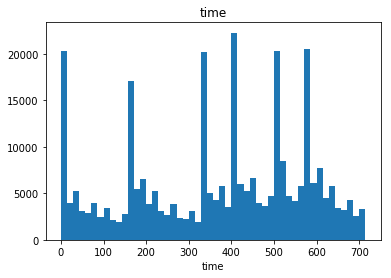

In [39]:
plt.hist(trans['time'],bins=50)
plt.xlabel("time")

plt.title("time")
plt

In [40]:
profile.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income'], dtype='object')

The graph shows histogram plot for age in profile dataset

Text(0.5,1,'age')

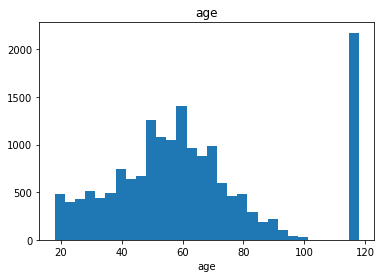

In [41]:
plt.hist(profile['age'],bins=30)
plt.xlabel("age")

plt.title("age")


The graph shows scatter plot for income vs age in profile dataset

Text(0.5,1,'age vs income')

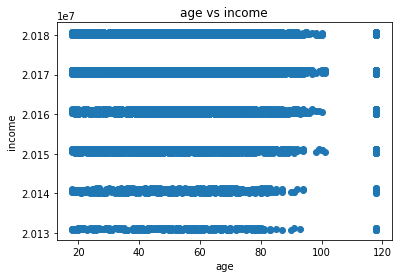

In [42]:
plt.scatter(profile['age'],profile['became_member_on'])
plt.xlabel("age")
plt.ylabel("income")
plt.title("age vs income")

The graph shows box plot for income in pofile dataset

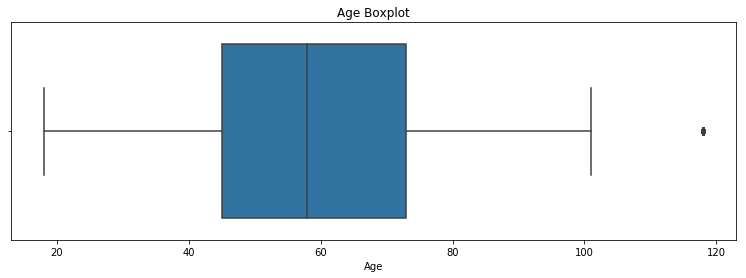

In [43]:
plt.figure(figsize=(13, 4))
sns.boxplot(profile['age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.xticks(rotation = 0)
plt.show();

Here we can see an outlier in the graph

The graph shows box plot for income in pofile dataset

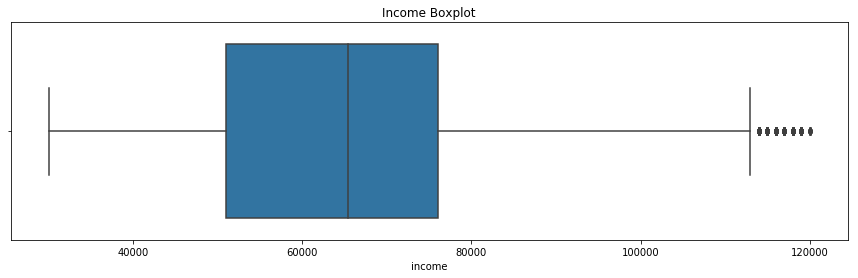

In [44]:
plt.figure(figsize=(15,4))
sns.boxplot(profile["income"])
plt.title('Income Boxplot')
plt.xlabel('income')
plt.xticks(rotation = 0)
plt.show();


Here again we can see outlier in the graph for distribution of income

  The following graph shows the distribution of age and income in profile dataset

<Container object of 17000 artists>

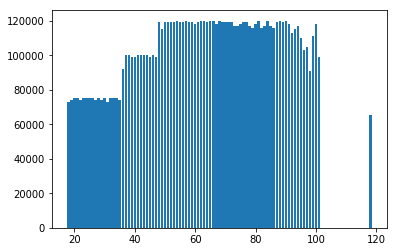

In [45]:
plt.bar(profile['age'],profile['income'])

In [46]:
count_age = profile['age'].value_counts()

In [47]:
count_age.shape

(85,)

This shows 85 different values in age column

In [48]:
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

######  The following distributes the age column in different age categories

In [49]:
profile['age_by_decade'] = pd.cut(x=profile['age'], bins=[10,19, 29, 39, 49,59,69,79,89,99,109,119], labels=['10s','20s', '30s', '40s','50s','60s','70s','80s','90s','100s','110s'])

In [50]:
profile['age_by_decade']

0        110s
1         50s
2        110s
3         70s
4        110s
5         60s
6        110s
7        110s
8         60s
9        110s
10       110s
11       110s
12        50s
13        60s
14        20s
15        60s
16        40s
17       110s
18        50s
19        60s
20        40s
21        60s
22        70s
23       110s
24        40s
25        50s
26       110s
27        30s
28        40s
29        50s
         ... 
16970     60s
16971     50s
16972     40s
16973     30s
16974     50s
16975     60s
16976     30s
16977    110s
16978     20s
16979     60s
16980    110s
16981     80s
16982    110s
16983     70s
16984     70s
16985     20s
16986     50s
16987     50s
16988     60s
16989    110s
16990     70s
16991    110s
16992     20s
16993     60s
16994    110s
16995     40s
16996     60s
16997     40s
16998     80s
16999     60s
Name: age_by_decade, Length: 17000, dtype: category
Categories (11, object): [10s < 20s < 30s < 40s ... 80s < 90s < 100s < 110s]

In [51]:
max_count_ages = profile['age'].value_counts()[1:].head(20).reset_index()

In [52]:
max_count_ages['index']

0     58
1     53
2     51
3     54
4     59
5     57
6     52
7     55
8     56
9     63
10    60
11    49
12    62
13    67
14    64
15    61
16    48
17    50
18    66
19    65
Name: index, dtype: int64

######  Age number for the customers we are leaving the first column with age 118

Text(0.5,0,'Age')

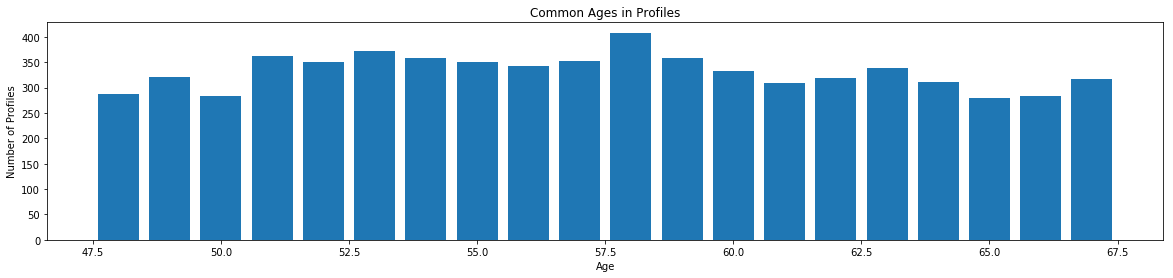

In [53]:
plt.figure(figsize=(20,4))
plt.bar(max_count_ages['index'],max_count_ages['age'])
plt.title('Common Ages in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Age')

Here we can see that the common age group acting as out biggest customer is 50

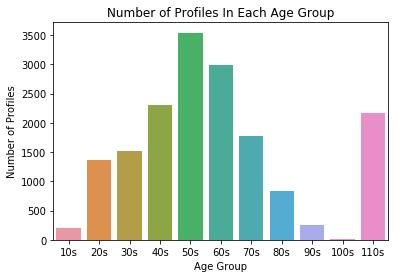

In [54]:
sns.countplot(x=profile['age_by_decade'])
plt.title('Number of Profiles In Each Age Group')
plt.ylabel('Number of Profiles')
plt.xlabel('Age Group')
plt.show();

###### Male are buying more than male and a good portion of database contains 'NA'

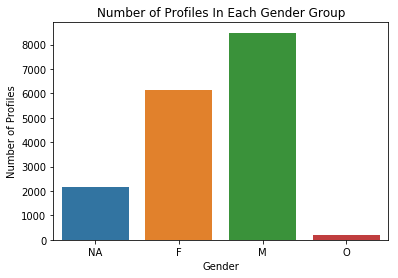

In [55]:
sns.countplot(x=profile['gender'])
plt.title('Number of Profiles In Each Gender Group')
plt.ylabel('Number of Profiles')
plt.xlabel('Gender')
plt.show();

In [56]:
profile['profile_per_month']=profile['became_member_on'].astype(str).str[:6]

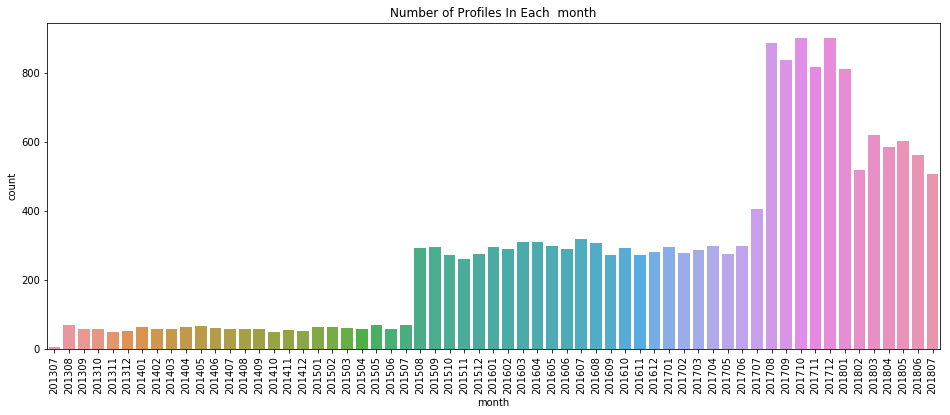

In [57]:
plt.figure(figsize=(16, 6))
sns.countplot(x=profile['profile_per_month'])
plt.title('Number of Profiles In Each  month')
plt.xlabel('month')
plt.xticks(rotation=90)
plt.show();

In [58]:
transcript.head()

,event,person,time,value,offer_id,reward,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0,0


###### We can see an increase in count in 2017 october and 2017 december

In [59]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

Text(0,0.5,'count')

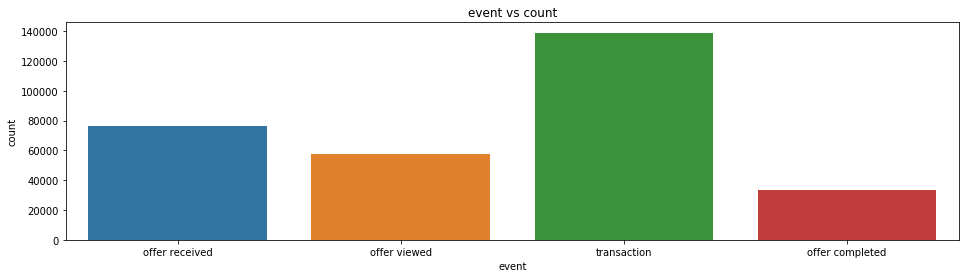

In [60]:
plt.figure(figsize=(16,4))
sns.countplot(x=transcript['event'])
plt.title("event vs count")
plt.xlabel("event")
plt.ylabel("count")

Here we can see that most people gor for transaction and there is a good amount of peoplr who view and dont make use of the offer and some people make use of the offers

In [61]:
transcript['person'].value_counts()

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
5e60c6aa3b834e44b822ea43a3efea26    48
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
bd2cdd691aca4bb0a0e039979ee5de5c    46
28681c16026943e68f26feaccab0907f    46
a42ed50acc4d4b25bca647c9e0b916ad    46
b1f4ece7d49342628a9ed77aee2cde58    46
ab25fd6fbd5040f880751921e4029757    44
9ae56116908640fc83477982da0aaec4    43
d087fd0166404163b7d1e1e7cf2a9ac7    43
ca265792e65949d79b2b0e91bdd31c57    43
86e9d338b85b4177b369fe6b0ad4fed3    43
4142f5e23db741b1af4be0287dc91c1c    43
0ebc3c4c39234ab6a2701fe2525705a9    42
cd9bac9e8aea4609929a55b9b468c88e    42
edc7b04392144da9979f3077095f268a    42
8e7d398d4bd948e397e201ad2bd5cce8    42
40ce078d5b2a43d19138a788754520be    42
0d74b166a5e54b269795dbaf38c6dfae    42
5da599f0f0ca40a6916e28487a55e655    41
1d755c218f714559a57ee7df7e6b1ca0    41
f0a3a3c05e3c4e2e84929a49a6b5488c    41
2ddc7d63c32d4606a7a45e3e70439b44    41
a6fce370a2ce4df995fc4899b

###### Q2 Average income for starbucks customer

In [62]:
profile['income'].mean()

65404.991568296799

##### Q3 Average age of the customers

In [63]:
profile['age'].describe()['mean']


62.531411764705879

##### Q4 Various types of offers being laid out

In [64]:
transcript['offer_id'].value_counts()

                                    138953
fafdcd668e3743c1bb461111dcafc2a4     20241
2298d6c36e964ae4a3e7e9706d1fb8c2     20139
f19421c1d4aa40978ebb69ca19b0e20d     19131
4d5c57ea9a6940dd891ad53e9dbe8da0     18222
ae264e3637204a6fb9bb56bc8210ddfd     18062
9b98b8c7a33c4b65b9aebfe6a799e6d9     16202
2906b810c7d4411798c6938adc9daaa5     15767
5a8bc65990b245e5a138643cd4eb9837     14305
0b1e1539f2cc45b7b9fa7c272da2e1d7     13751
3f207df678b143eea3cee63160fa8bed     11761
Name: offer_id, dtype: int64

In [65]:
transcript['offer_id'].value_counts().index.tolist()

['',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 '2906b810c7d4411798c6938adc9daaa5',
 '5a8bc65990b245e5a138643cd4eb9837',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '3f207df678b143eea3cee63160fa8bed']

In [66]:
transcript['offer_id'].dtype

dtype('O')

##### Q5 Distribution of these offers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

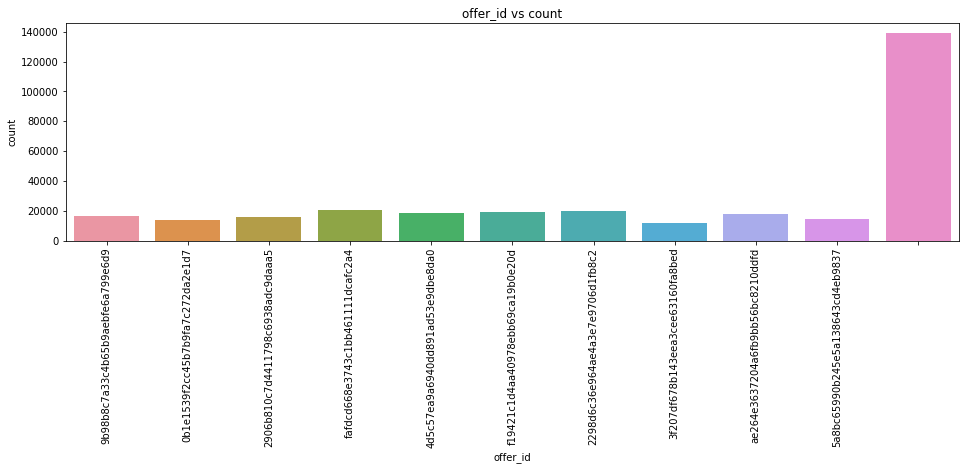

In [67]:
plt.figure(figsize=(16,4))
sns.countplot(x=transcript['offer_id'])
plt.title("offer_id vs count")
plt.xlabel("offer_id")
plt.ylabel("count")
plt.xticks(rotation=90)

###### This shows the most columns dont have offer id

In [68]:
transcript.columns

Index(['event', 'person', 'time', 'value', 'offer_id', 'reward', 'amount'], dtype='object')

In [69]:
id_offer = transcript['offer_id'].value_counts().index.tolist()[1:]

In [70]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [71]:
offer_type=transcript['event'].value_counts().index.tolist()
offer_type

['transaction', 'offer received', 'offer viewed', 'offer completed']

In [72]:
transcript['event'][transcript['offer_id']=='fafdcd668e3743c1bb461111dcafc2a4'].value_counts()['offer received']

7597

In [73]:
new_df=pd.DataFrame(id_offer)

In [74]:
new = pd.DataFrame(columns=['transaction', 'offer_received', 'offer_viewed', 'offer_completed'])

new_df.join(new)

In [75]:
new_df=new_df.join(new)

In [76]:
new_df.columns

Index([0, 'transaction', 'offer_received', 'offer_viewed', 'offer_completed'], dtype='object')

##### Q6 Distribution of offers into received viewd and completed and how many times transaction was done?
A new dataframe is created to view the distribution

In [77]:
def get_count_offer_received():
    '''
    Input 
    Though not explicitly taken but the input is transcript['event']
    Output
    Classificationof all the offers based on the no of times they were received by customers
    '''
    o=0
    for i in id_offer:
        new_df.offer_received[o]=transcript['event'][transcript['offer_id']==i].value_counts()['offer received']
        print(transcript['event'][transcript['offer_id']==i].value_counts()['offer received'])
        o=o+1
        
        

In [78]:
get_count_offer_received()

7597
7646
7571
7593
7658
7677
7632
7618
7668
7617


In [79]:
def get_count_transaction():
    '''
    Input 
    Though not explicitly taken but the input is transcript['event']
    Output
    Classificationof all the offers based on the no of times transaction was done
    '''
    o=0
    for i in id_offer:
        try:
            new_df.transaction[o]=transcript['event'][transcript['offer_id']==i].value_counts()['transaction']
            o=o+1
        except:
            new_df.transaction[o]=0
            o=o+1
        

In [80]:
get_count_transaction()

In [83]:
def get_count_offer_viewed():
    '''
    Input 
    Though not explicitly taken but the input is transcript['event']
    Output
    Classificationof all the offers based on the no of times they were viewed by customers
    '''
    o=0
    for i in id_offer:
        new_df.offer_viewed[o]=transcript['event'][transcript['offer_id']==i].value_counts()['offer viewed']
        print(transcript['event'][transcript['offer_id']==i].value_counts()['offer received'])
        o=o+1

In [87]:
get_count_offer_viewed()

7597
7646
7571
7593
7658
7677
7632
7618
7668
7617


In [88]:
def get_count_offer_completed():
    '''
    Input 
    Though not explicitly taken but the input is transcript['event']
    Output
    Classificationof all the offers based on the no of times they were completed by customers
    '''
    o=0
    for i in id_offer:
        try:
            new_df.offer_completed[o]=transcript['event'][transcript['offer_id']==i].value_counts()['offer completed']
            o=o+1
        except:
            new_df.offer_completed[o]=0
            o=o+1
        
        #print(transcript['event'][transcript['offer_id']==i].value_counts()['offer received'])


In [89]:
get_count_offer_completed()

In [90]:
new_df

,0,transaction,offer_received,offer_viewed,offer_completed
0,fafdcd668e3743c1bb461111dcafc2a4,0,7597,7327,5317
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0,7646,7337,5156
2,f19421c1d4aa40978ebb69ca19b0e20d,0,7571,7264,4296
3,4d5c57ea9a6940dd891ad53e9dbe8da0,0,7593,7298,3331
4,ae264e3637204a6fb9bb56bc8210ddfd,0,7658,6716,3688
5,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,7677,4171,4354
6,2906b810c7d4411798c6938adc9daaa5,0,7632,4118,4017
7,5a8bc65990b245e5a138643cd4eb9837,0,7618,6687,0
8,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,7668,2663,3420
9,3f207df678b143eea3cee63160fa8bed,0,7617,4144,0


###### `The above dataframe shows the response of various of customers towards the various offer_ids

###### This shows that offer_id with least completion are 5a8bc65990b245e5a138643cd4eb9837	and 3f207df678b143eea3cee63160fa8bed 

##### Q7 Classification of offer_ids into offer type

In [91]:
def get_offer_type(offer_id):
    try:
        offer_type = portfolio[portfolio['id'] == offer_id]['offer_type'].values[0]
        return offer_type
    except:
        offer_type = 'NA'
        return offer_type

transcript['offer_type_map'] = transcript.apply(lambda x: get_offer_type(x['offer_id']), axis=1)

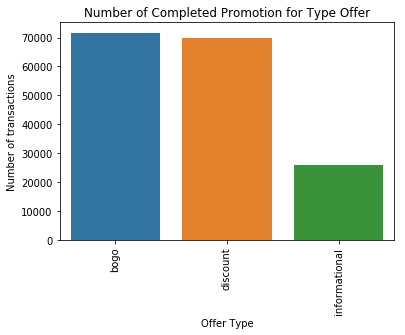

In [92]:
sns.countplot(transcript[transcript['offer_type_map'] != 'NA']['offer_type_map'])
plt.title('Number of Completed Promotion for Type Offer')
plt.ylabel('Number of transactions')
plt.xlabel('Offer Type')
plt.xticks(rotation = 90)
plt.show();

######  We can see that bogo and discount offers are offeres in a lot compared to informational offers

In [93]:
transcript

,event,person,time,value,offer_id,reward,amount,offer_type_map
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,0,discount
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0,0,discount
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0,0,bogo
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,discount
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,0,0,informational
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount


In [94]:
transcript['person'][transcript['event']=='offer completed'].value_counts()

e22206bf65234c0e9f273bef859c02a1    6
a20c4cf47deb418f8e995c9015f15fda    6
8c410d84af08408fb41f953c93ffac27    6
9c569de8e9f747bcb5c8f78c0a014fc5    6
516e91869c8546d8a885401e850ce66c    6
f1d65ae63f174b8f80fa063adcaa63b7    6
cc328665db7d4f77babe3cb7c87e2e2f    6
c94c15ddd30845faaf072d20b111aa1e    6
94ce14b4e3774ecd908575ba7ab32f85    6
f31e27cdcdac4b0a9a384c0567a7ae43    6
9196c2bfb739494f902a13bab46199d2    6
1e5d6388b5214fefb090a9a2a4d21983    6
41eb66dfb4824a029f7abb81c140c267    6
7055b5fa5f8647618aa14e220b7c6b5c    6
07e29d02d0074da28b430e1dc40cc1fc    6
06d7f5abc31b4a02836349333ac02f33    6
aa445cee24ba41389eadabcf2fc95bac    6
d80f9e3f974448ec902c42818097ebf3    6
0494aa6671414fab9837fa3cd45e72bc    6
759c2269abc44dfdb8e6d140d4060856    6
adc7ef85f1714699b4f341a7e12c632f    6
a0db7a1fb55e402cb7f5b8ddc10b0818    6
82980813d7094cf5878dd906a6734307    6
bdfba75f0e0c4533b4b6b97fa37daa4f    6
325da16cf16c4d72972f28281f752201    6
acdf9a19b60d4c13ad594ebcb6b23eb9    6
cb45be0c399a

In [95]:
heavy_buying_customer =transcript[(transcript['event']=='offer_completed') | (transcript['event']=='transaction')].groupby(['person'])['amount','event']

In [96]:
unique_customer=transcript[(transcript['event']=='offer_completed') | (transcript['event']=='transaction')]['person'].unique()

In [97]:
customer_df=pd.DataFrame(unique_customer)

In [98]:
amount=pd.DataFrame(columns=['amount'])

In [99]:
customer_df=customer_df.join([amount])
customer_df

,0,amount
0,02c083884c7d45b39cc68e1314fec56c,NaN
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,NaN
2,54890f68699049c2a04d415abc25e717,NaN
3,b2f1cd155b864803ad8334cdf13c4bd2,NaN
4,fe97aa22dd3e48c8b143116a8403dd52,NaN
5,629fc02d56414d91bca360decdfa9288,NaN
6,bbeb54e861614fc7b22a8844f72dca6c,NaN
7,a97e6f33219c432db82acfa0d19c602d,NaN
8,676506bad68e4161b9bbaffeb039626b,NaN
9,8f7dd3b2afe14c078eb4f6e6fe4ba97d,NaN


###### Q8 For all the unique customers how much amount do they spend and who all are theloyal customers

In [100]:
op=0 # for all unique customers the amount they spend for various offers is added
for customer in heavy_buying_customer:
    customer_df.amount[op]=customer[1]['amount'].sum()
    op=op+1

In [101]:
customer_df=customer_df.sort_values(['amount'],ascending=False)

In [102]:
customer_df.head(10)

,0,amount
3929,e2f8376c32084327b1991706b124c8ed,1606
15693,ed127151cf1c4c70bcb2c9a50ce749c8,1360
11422,431a9ec074b44e80886ba3dfed6dfe2f,1320
7492,8571868385524806bcacd7e73c1ae5e1,1314
6366,6118ca1b782a4df0a852406b194219b2,1314
5358,408574b846484c9f97f458b678a01a0e,1285
11334,9407a3a0c9114b15b05f7704d0b40ef0,1256
13672,c2df0a0925684591975861d7622ac296,1244
9673,7784652beb5d4a26955c561b63f3099b,1224
6484,ae5f3528d8324fcbbdbc51cf8a46cffa,1206


######  These are the top spenders 

###### Q9 distribution of events in transcript

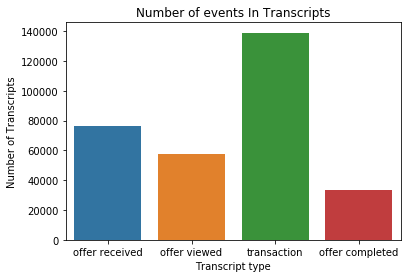

In [103]:
sns.countplot(transcript['event'])
plt.title('Number of events In Transcripts')
plt.ylabel('Number of Transcripts')
plt.xlabel('Transcript type')
plt.xticks(rotation = 0)
plt.show();

###### Q10 What is the most common promotion among various age groups?

In [104]:
#the person id from profile dataset is mapped to transcript dataset
def age_offer(id):  
    age_group = profile[profile['id']==id]['age_by_decade'].values[0]
    return age_group


In [105]:
transcript['age_offer']=transcript.apply(lambda x:age_offer(x['person']),axis=1)

In [106]:
transcript.head()

,event,person,time,value,offer_id,reward,amount,offer_type_map,age_offer
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,70s
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,110s
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,0,discount,60s
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,110s
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,110s


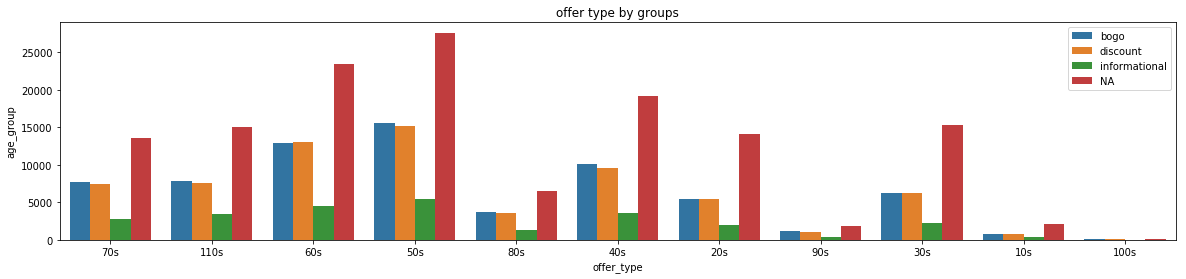

In [107]:
plt.figure(figsize=(20,4))
sns.countplot(x="age_offer",hue="offer_type_map",data=transcript)
plt.xlabel("offer_type")
plt.ylabel("age_group")
plt.title("offer type by groups")
plt.legend()

###### The graph describes the distribution of offers among various age groups and also the unavalibility of data in this respect

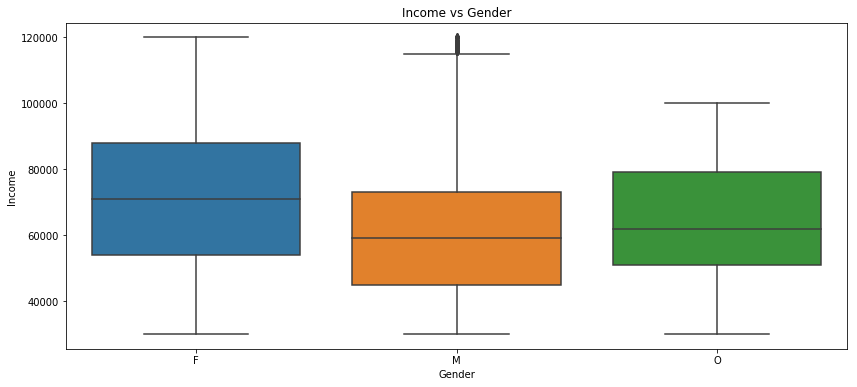

In [108]:

plt.figure(figsize=(14, 6))
sns.boxplot(x=profile[profile['gender'] != 'NA']['gender'], y=profile['income'])
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

###### The above graph represents the income distribution among genders

In [109]:
def gender_offer(id):
    gender_of=profile[profile['id']==id]['gender'].values[0]
    return gender_of
transcript['map_gender_offer']=transcript.apply(lambda x:gender_offer(x['person']),axis=1)
    

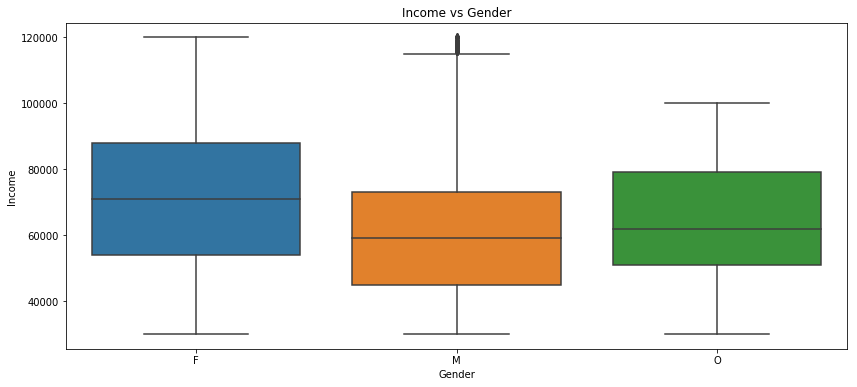

In [110]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=profile[profile['gender'] != 'NA']['gender'], y=profile['income'])
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

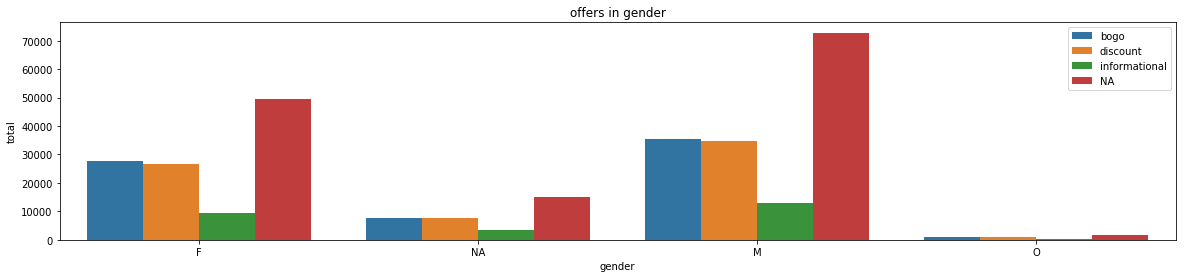

In [111]:
plt.figure(figsize=(20,4))
sns.countplot(x="map_gender_offer",hue="offer_type_map",data=transcript)
plt.xlabel("gender")
plt.ylabel("total")
plt.title("offers in gender")
plt.legend()

######  The graph shows the distribution of offers among genders

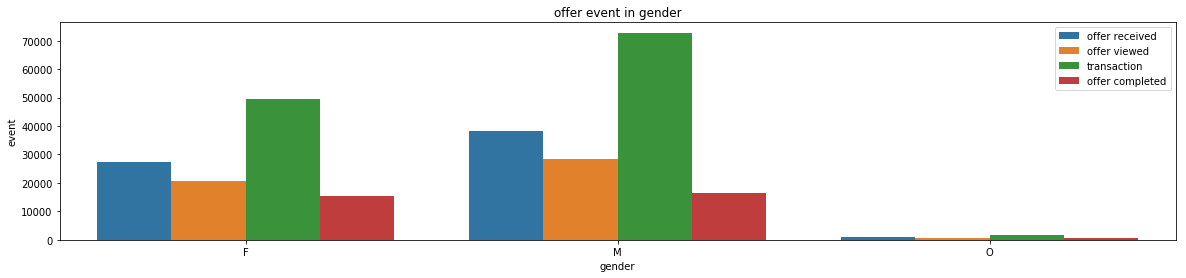

In [112]:
plt.figure(figsize=(20,4))
sns.countplot(x=transcript[transcript["map_gender_offer"]!='NA']["map_gender_offer"],hue=transcript["event"])
plt.xlabel("gender")
plt.ylabel("event")
plt.title("offer event in gender")
plt.legend()

In [113]:
transcript.columns

Index(['event', 'person', 'time', 'value', 'offer_id', 'reward', 'amount',
       'offer_type_map', 'age_offer', 'map_gender_offer'],
      dtype='object')

###### From the above two graphs it is conclusive that males received more offers compared to woman and hence offer completion is also more for them 

In [114]:
offer_gender_type = transcript[transcript["map_gender_offer"] != 'NA'].groupby(['map_gender_offer','offer_type_map']).count()
offer_gender_event = transcript[transcript["map_gender_offer"] != 'NA'].groupby(['map_gender_offer','event']).count()

In [115]:
offer_gender_type,offer_gender_event

(                                 event  person   time  value  offer_id  \
 map_gender_offer offer_type_map                                          
 F                NA              49382   49382  49382  49382     49382   
                  bogo            27619   27619  27619  27619     27619   
                  discount        26652   26652  26652  26652     26652   
                  informational    9448    9448   9448   9448      9448   
 M                NA              72794   72794  72794  72794     72794   
                  bogo            35301   35301  35301  35301     35301   
                  discount        34739   34739  34739  34739     34739   
                  informational   12856   12856  12856  12856     12856   
 O                NA               1781    1781   1781   1781      1781   
                  bogo              914     914    914    914       914   
                  discount          920     920    920    920       920   
                  informa

##### Q11 how are the people among various genders taking these offers and how effective the offers are?

the no of females completing the offer

In [116]:
transcript[(transcript["map_gender_offer"]=="F") & (transcript["event"]=="offer completed")].count()[1]

15477

 the no of males completing the offer

In [117]:
transcript[(transcript["map_gender_offer"]=="M") & (transcript["event"]=="offer completed")].count()[1]

16466

the no of females receiving the offer

In [118]:
transcript[(transcript["map_gender_offer"]=="F") & (transcript["event"]=="offer received")].count()[1]

27456

 the no of males receiving the offer

In [119]:
transcript[(transcript["map_gender_offer"]=="M") & (transcript["event"]=="offer received")].count()[1]

38129

the no of females viewing the offer

In [120]:
transcript[(transcript["map_gender_offer"]=="F") & (transcript["event"]=="offer viewed")].count()[1]

20786

 the no of males viewing the offer

In [121]:
transcript[(transcript["map_gender_offer"]=="M") & (transcript["event"]=="offer viewed")].count()[1]

28301

the no of females completing the transaction

In [122]:
transcript[(transcript["map_gender_offer"]=="F") & (transcript["event"]=="transaction")].count()[1]

49382

 the no of males completing the transaction

In [123]:
transcript[(transcript["map_gender_offer"]=="M") & (transcript["event"]=="transaction")].count()[1]

72794

Hence no of females who completed the offer is 15477 and no of males who completed the offer is 16466 and total number of females receiving the offer is 27456 and that of males is 38129 WITH 20786 females viewing the offer and 28301 males viewing the offer. Hence in proportion 56.37 % woman completed the offer and 43.6% woman only viewed the offer and in males 43.18% completed the offer and 56.81% viewed the offer with no of males receiving the offer more than no. of females. For transaction no of females doing transaction is 49382 and that of males is 72794

So we come to a conclusion that females are more in number for completing offers and male for transaction

###### adding income column into transcript data

In [124]:
#taking people_id from profile dataset and mapping it to transcript to get their income
def income_pro(id):
    inc=profile[profile['id']==id]['income'].values[0]
    return inc
transcript['income']=transcript.apply(lambda x:income_pro(x['person']),axis=1)
    

###### converting all the datsets into csv file and saving

In [125]:
transcript.to_csv("new_transcript.csv")
portfolio.to_csv("new_portfolio.csv")
profile.to_csv("new_profile.csv")

######  checking if there are any null values in the columns

In [126]:
transcript.isna().sum()

event               0
person              0
time                0
value               0
offer_id            0
reward              0
amount              0
offer_type_map      0
age_offer           0
map_gender_offer    0
income              0
dtype: int64

In [127]:
portfolio.isna().sum()

difficulty       0
duration         0
id               0
offer_type       0
reward           0
bogo             0
discount         0
informational    0
email            0
mobile           0
social           0
web              0
dtype: int64

#### MODELLING

Let the variable to be predicted be event in transcript 

Following cells involve removal of some information and convertinf of some columns into dummies

In [128]:
transcript

,event,person,time,value,offer_id,reward,amount,offer_type_map,age_offer,map_gender_offer,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,70s,F,100000.000000
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,110s,NA,65404.991568
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,0,discount,60s,M,70000.000000
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,110s,NA,65404.991568
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,110s,NA,65404.991568
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0,0,bogo,60s,M,53000.000000
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,discount,110s,NA,65404.991568
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,0,0,informational,50s,M,51000.000000
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,60s,F,57000.000000
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,60s,F,71000.000000


Removing all 'NA' in transcript.event

In [129]:
tran=transcript[transcript['event']!='NA']

converting event column into different columns as per the various events

In [130]:
data=pd.get_dummies(transcript['event'])

In [131]:
tran=tran.join(data) #joining data and tran

In [132]:
tran=tran.drop('value',axis=1)

In [133]:
data=pd.get_dummies(transcript['offer_type_map']) #dumming offer_type_map column

In [134]:
tran=tran.join(data) #joining data and tran

In [135]:
data=pd.get_dummies(transcript['offer_id']) #dumming offer_id column

In [136]:
tran=tran.join(data) #joining data and tran

In [137]:
tran

,event,person,time,offer_id,reward,amount,offer_type_map,age_offer,map_gender_offer,income,...,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,3f207df678b143eea3cee63160fa8bed,4d5c57ea9a6940dd891ad53e9dbe8da0,5a8bc65990b245e5a138643cd4eb9837,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,70s,F,100000.000000,...,0,0,0,0,0,0,1,0,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,110s,NA,65404.991568,...,1,0,0,0,0,0,0,0,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,60s,M,70000.000000,...,0,0,1,0,0,0,0,0,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,110s,NA,65404.991568,...,0,0,0,0,0,0,0,0,0,1
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,110s,NA,65404.991568,...,0,0,0,0,1,0,0,0,0,0
5,offer received,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,0,0,bogo,60s,M,53000.000000,...,0,0,0,0,0,0,0,0,1,0
6,offer received,c4863c7985cf408faee930f111475da3,0,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,discount,110s,NA,65404.991568,...,0,1,0,0,0,0,0,0,0,0
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,0,0,informational,50s,M,51000.000000,...,0,0,0,1,0,0,0,0,0,0
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,60s,F,57000.000000,...,1,0,0,0,0,0,0,0,0,0
9,offer received,31dda685af34476cad5bc968bdb01c53,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,60s,F,71000.000000,...,1,0,0,0,0,0,0,0,0,0


######  Dropping some columns and selecting others as features

In [138]:
tran.columns

Index(['event', 'person', 'time', 'offer_id', 'reward', 'amount',
       'offer_type_map', 'age_offer', 'map_gender_offer', 'income',
       'offer completed', 'offer received', 'offer viewed', 'transaction',
       'NA', 'bogo', 'discount', 'informational', '',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7', '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '2906b810c7d4411798c6938adc9daaa5', '3f207df678b143eea3cee63160fa8bed',
       '4d5c57ea9a6940dd891ad53e9dbe8da0', '5a8bc65990b245e5a138643cd4eb9837',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'ae264e3637204a6fb9bb56bc8210ddfd',
       'f19421c1d4aa40978ebb69ca19b0e20d', 'fafdcd668e3743c1bb461111dcafc2a4'],
      dtype='object')

######  The following columns are selected as target variables

In [139]:
targets = tran[["offer completed","offer received","offer viewed","transaction"]]

In [140]:
features=tran.drop(["person","event","offer_id","offer_type_map","offer completed","offer received","offer viewed","transaction"],axis=1)

In [141]:
features=features.drop(['',"NA"],axis=1)

In [142]:
data=pd.get_dummies(transcript['map_gender_offer'])

In [143]:
features=features.join(data)

In [144]:
features=features.drop(["map_gender_offer"],axis=1)

In [145]:
remove_s=lambda x:x[:-1]
features['age_offer']=features["age_offer"].apply(remove_s)

In [146]:
features['age_offer']=features['age_offer'].astype(int)


In [147]:
features

,time,reward,amount,age_offer,income,bogo,discount,informational,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,...,4d5c57ea9a6940dd891ad53e9dbe8da0,5a8bc65990b245e5a138643cd4eb9837,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4,F,M,NA,O
0,0,0,0,70,100000.000000,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,110,65404.991568,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,60,70000.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,110,65404.991568,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,110,65404.991568,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,0,0,60,53000.000000,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,0,0,0,110,65404.991568,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,50,51000.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,60,57000.000000,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,60,71000.000000,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Normalising all the columns having large values so that they do not dominate in the model and all rows are equal

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
to_normalize = ['time', 'amount', 'reward', 'income','age_offer']

features[to_normalize] = scaler.fit_transform(features[to_normalize])
features.head()

,time,reward,amount,age_offer,income,bogo,discount,informational,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,...,4d5c57ea9a6940dd891ad53e9dbe8da0,5a8bc65990b245e5a138643cd4eb9837,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4,F,M,NA,O
0,0.0,0.0,0.0,0.6,0.777778,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.0,0.0,0.0,1.0,0.393389,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.5,0.444444,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,1.0,0.393389,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.0,0.0,0.0,1.0,0.393389,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [149]:

from sklearn.model_selection import train_test_split, GridSearchCV

In [150]:

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0) #splitting data into train and test sets

In [151]:

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (229900, 22)
Training Labels Shape: (229900, 4)
Testing Features Shape: (76634, 22)
Testing Labels Shape: (76634, 4)


Model using Decision tree classifier gets an accuracy of 95.5% on test set

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=100, min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                            class_weight=None, presort='deprecated')

dt.fit(X_train, y_train)
yt_pred=dt.predict(X_train)
print(f'Accuracy of Decision Tree classifier on training set: {accuracy_score( y_train,yt_pred)*100}%.')
y_pred=dt.predict(X_test)
print(f'Prediction Accuracy: {accuracy_score(y_test, y_pred)*100}%')

Accuracy of Decision Tree classifier on training set: 95.64984775989561%.
Prediction Accuracy: 95.56071717514419%


Model using RandomForestClassifier gets an accuracy of 91.3% on test set

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rc = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None,min_samples_split=50, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=2, warm_start=False,class_weight=None)

rc.fit(X_train, y_train)
yt_pred=rc.predict(X_train)
print(f'Accuracy of Decision Tree classifier on training set: {accuracy_score( y_train,yt_pred)*100}%.')
y_pred=rc.predict(X_test)
print(f'Prediction Accuracy: {accuracy_score(y_test, y_pred)*100}%')

building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy of Decision Tree classifier on training set: 91.99869508481949%.
Prediction Accuracy: 91.2480100216614%


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.1s finished


Model built using Kneighbours Classifier rreached an accuracy og 86% on test set

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kn = KNeighborsClassifier()

kn.fit(X_train, y_train)
yt_pred=kn.predict(X_train)
print(f'Accuracy of Decision Tree classifier on training set: {accuracy_score( y_train,yt_pred)*100}%.')
y_pred=kn.predict(X_test)
print(f'Prediction Accuracy: {accuracy_score(y_test, y_pred)*100}%')

Accuracy of Decision Tree classifier on training set: 90.72422792518486%.
Prediction Accuracy: 86.0049064383955%


We can see that the best accuracy is achieved with decison tree classifier of 95.5% on test set

Following cells depict the use of GridSearchCV for improving model

In [163]:
from sklearn.model_selection import GridSearchCV
min_samples_leaf=[10,20,40,50,100]
min_samples_split=[10,30,50,40,100]
min_weight_fraction_leaf=[0.0,0.1,0.4]
min_impurity_decrease=[0.0,0.2]
max_features=["auto","sqrt"]
param_grid = dict( min_weight_fraction_leaf=min_weight_fraction_leaf,min_samples_leaf=min_samples_leaf,min_samples_split = min_samples_split, max_features = max_features,min_impurity_decrease=min_impurity_decrease)

grid = GridSearchCV(estimator=dt, param_grid=param_grid,cv=3,n_jobs=-1)

In [ ]:
grid_result = grid.fit(X_train, y_train)


In [ ]:

print(f'Best Score: {grid_result.best_score_}')
print(f'Best params: {grid_result.best_params_}')

###### Conclusion

An attempt has been made to analyze the dataset of Starbucks and understand the data and make model to predict how will a customer take the offer whether thee offer will be received or not and whether it will be completed. Firstly the data is analysed and explored and relation between different variables is understood with the help of graphs. The distribution of variables in the data =set, what types of customer base is there and gender wise distribution of the customer base based on their income and how much offers do they receive do they complete the offer or not is analysed.It is found that Females  complete offers compared to males with 56% completion of what they receive compared to 43.18% among males but males receive more offers than females. The scenario completely changes for transactions which is 72794 among males and 49382 among females. Further exploration was made on which offer is being received better by the customer. Hence females could be given more offers further offer id fafdcd668e3743c1bb461111dcafc2a4 should be more distributed compared to others since it is completed more number of times.

###### `Improvements
Improvement can be made on how NAN values are filled and compeleting the NAN values, further location based data could be used for location specific recommmendations.All these could help us to give more personalised recommendation to customers